# This is an examples of how to use the rb_vfit program


## Written By: Rongmon Bordoloi
Feb 22, 2019
Tested on Python 3.7


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from importlib import reload

from rbvfit import rb_vfit as r
reload(r)

<module 'rbvfit.rb_vfit' from '/Users/bordoloi/WORK/python/rbvfit/src/rbvfit/rb_vfit.py'>

# Example USE

The following code snippets show how to call and use the rb_vfit object to create a Voigt profile 

## Initiate a line object

In [2]:
line = r.model()

## Set up the species, and redshift and several clumps

In [3]:
lambda_rest=1215.67
zabs=0
line.addline(lambda_rest, z=zabs)
line.addline(lambda_rest, z=zabs)


## Set up a wavelength grid 
Using 0.01 Angstrom/ pixel similar to COS spectra

In [21]:
wave=np.arange(1208.,1220.,0.01)

## Set up the model by defining N, b, and v

In [22]:

N=np.array([14.,13.])
b=np.array([20.,21.])
v=np.array([10.,-50.])
theta=np.concatenate((N,b,v))


## Now create Voigt Profile

In [24]:
flx, components = r.model_profile(theta, wave, line)

## Plot the generated Absorption Profile

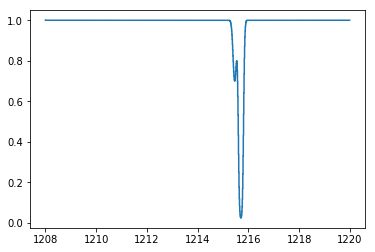

In [25]:
plt.step(wave,flx)

#---------------------------------------------------------

# The next example is a wrapper to do everything in one go

# For end users: USE THE FOLLOWING

In [16]:
from rbvfit import model as m
reload(m)

<module 'rbvfit.model' from '/Users/bordoloi/WORK/python/rbvfit/src/rbvfit/model.py'>

# First initialize the model you want to use
e.g. set up the redshifts and instrument settings and transition wavelengths first

In [17]:
wave=np.arange(1208.,1220.,0.01)
# We are setting up 3 clumps at z = 0
#  For Lya absorption
# . With default 6.5 pixel FWHM of HST/COS and Gaussian convolution
zabs=np.array([0.])
lambda_rest = [1215.67]# * np.ones((len(zabs),))

nclump=3
ntransition=1

s=m.create_voigt(zabs,lambda_rest,nclump)

# Now we are all set to use the object to create voigt profiles for different settings

In [18]:
N=np.array([14.,13., 16.])
b=np.array([20.,21.,29.])
v=np.array([10.,-100.,-200.])
theta=np.concatenate((N,b,v))


outflux= s.model_flux(theta,wave)


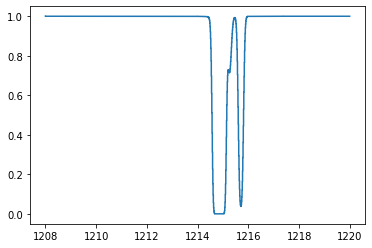

In [19]:
plt.step(wave,outflux)

In [17]:
zlist=np.array([0.3,1.3,1.2])

In [18]:
zlist=np.append(np.repeat(z[0],3),zlist[1:])


In [19]:
zlist

array([0.3, 0.3, 0.3, 1.3, 1.2])

In [22]:
lam_rest=np.array([2796.3,2803.5,1215.67])
ncl=3
nt=2

In [24]:
lam_restlist=[]
for i in range(0,nt):
    lam_restlist=np.append(lam_restlist,np.repeat(lam_rest[i],ncl))
lam_restlist=np.append(lam_restlist,lam_rest[nt:])

In [25]:
lam_restlist


array([2796.3 , 2796.3 , 2796.3 , 2803.5 , 2803.5 , 2803.5 , 1215.67])